<a href="https://colab.research.google.com/github/0205NGONO/Calculatrice_avanc-e/blob/main/Copy_of_Minist_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des bibliothèques

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as kr
import matplotlib.pyplot as plt

Chargement des données

In [ ]:
(train_images, train_labels), (test_images, test_labels) = kr.datasets.mnist.load_data()

train_images = ((train_images[..., None] / 255.0) - 0.1307) / 0.3081
test_images = ((test_images[..., None] / 255.0) - 0.1307) / 0.3081

batch_size = 64
train_set = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(batch_size)
test_set = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

Affichage de quelques images

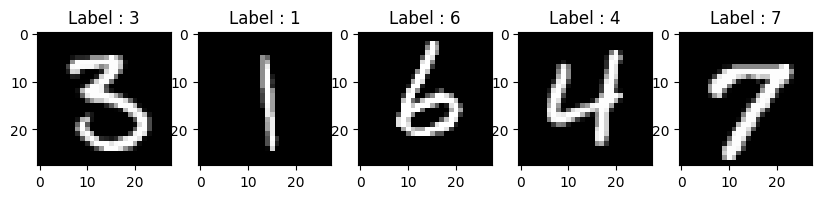

In [ ]:
images, labels = next (iter(train_set))

fig = plt.figure(figsize = (10,5))

for i in range (5) :
 ax= fig.add_subplot (1, 5, i+1)
 img = images[i, :, :, 0]
 ax.imshow (img, cmap= "gray")
 ax.set_title(f'Label : {labels[i].numpy()}')

plt.show ()

Modèle CNN

In [ ]:
model = kr.models.Sequential ([
  #bloc 1
  kr.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
  kr.layers.MaxPooling2D(pool_size=2, strides=2),

  #bloc 2
  kr.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
  kr.layers.MaxPooling2D(pool_size=2, strides=2),

  #bloc 3
  kr.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
  kr.layers.MaxPooling2D(pool_size=2, strides=2),

  #Applatissement
  kr.layers.Flatten(),
  kr.layers.Dense(256, activation='relu'),
  kr.layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilation du modèle

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Entraînement du modèle

In [ ]:
num_epochs = 10
history = model.fit(train_set, epochs=num_epochs, validation_data=test_set)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 112s 117ms/step - accuracy: 0.9118 - loss: 0.2904 - val_accuracy: 0.9879 - val_loss: 0.0396
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 117ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9909 - val_loss: 0.0280
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9923 - val_loss: 0.0239
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9920 - val_loss: 0.0262
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9909 - val_loss: 0.0276
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 114ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9873 - val_loss: 0.0357
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 113ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9927 - val_loss: 0.0239
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.9979 -

Évaluation du modèle

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f} %")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9875 - loss: 0.0416
Test loss: 0.0301
Test Accuracy: 99.07 %


Courbe de perte

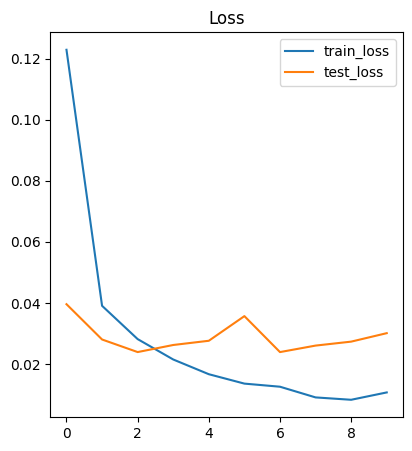

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Courbe d'exactitude (accuracy)

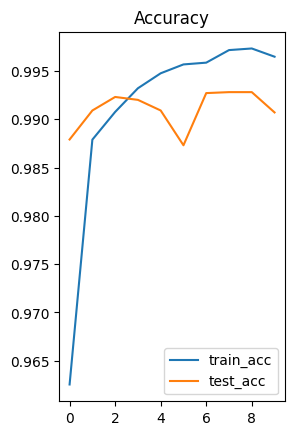

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend()
plt.title('Accuracy')

plt.show()

Quelques prédictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


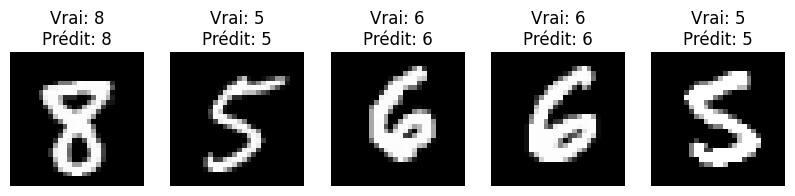

In [ ]:
images, labels = next(test_iterator)

# prédiction proprement dite
preds = model.predict(images)
pred_labels = np.argmax(preds, axis=1)

#Affichage
fig = plt.figure(figsize=(10,5))
for i in range(5):  # Afficher 5 images
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(images[i, :, :, 0], cmap='gray')
    ax.set_title(f"Vrai: {labels[i].numpy()}\nPrédit: {pred_labels[i]}")
    ax.axis('off')
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
model.save("model.keras")